## Top 10 Most Frequent Technologies
This notebook explores the top most frequent technologies found for Data Analysts, Data Scientists, Data Engineers, Machine Learning Engineers, and BI Analysts.

Results are visualized using horizontal bar charts.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [4]:
def get_search_list():  
    '''
    This function returns a fresh instance of the Main Dictionary (all words/items have 
    "found" set to False).
    The Main Dictionary contains all the words we want to find in the job listing description.
    Many words have variations and these variations need to be accounted for. Some words/items
    contain multiple tokens such as "scikit-learn". We need to seperate one, two, and three
    token variations because they each require different search methods. The goal of this
    data structure is to contain all the components necessary to do the search, contain 
    the result of the search, and be in an efficient format for time complexity. 
    '''
    
    main_dictionary = {
        "programming_query_languages": {
            "python": {
                'one_token': ["python"], 
                'found': False
            }, 
            "r": {
                'one_token': ["r"],
                'found': False
            },
            "c++": {
                'one_token': ["c++", "cpp"],
                'found': False
            },
            "rust": {
                'one_token': ["rust", "rustlang"],
                'found': False
            },
            "sql": {
                'one_token': ["sql"],
                'found': False
            },
            "java": {
                'one_token': ["java"],
                'found': False
            },
            "javascript": {
                'one_token': ["javascript", "js", "ecmascript"],
                'found': False
            },
            "c#": {
                'two_token': [["c", "#"]],
                'found': False
            }, 
            "spark": {
                'one_token': ["spark"], # could be a false positive
                'found': False
            },  
            "scala": {
                'one_token': ["scala"],
                'found': False
            },
            "xml": {
                'one_token': ["xml"],
                'found': False
            },
            "vba": {
                'one_token': ["vba"],
                'found': False
            },
            "julia": {
                'one_token': ["julia"],
                'found': False
            },
            "typescript": {
                'one_token': ["typescript", "ts"], 
                'found': False
            },
            "swift": {
                'one_token': ["typescript"], 
                'found': False
            },
            "php": {
                'one_token': ["php"], 
                'found': False
            },
            "ruby": {
                'one_token': ["ruby"], 
                'found': False
            },
            "perl": {
                'one_token': ["perl"], 
                'found': False
            },
            "matlab": {
                'one_token': ["matlab"], 
                'found': False
            },
            "graphql": {
                'one_token': ["graphql"], 
                'found': False
            },
        },
        "libraries_and_packages": {
            "numpy": {
                'one_token': ["numpy", "np"], # not sure if np is necessary
                'found': False
            },
            "pandas": {
                'one_token': ["pandas", "pd"], # not sure if pd is necessary
                'found': False
            },
            "spacy": {
                'one_token': ["spacy"],
                'found': False
            },
            "scikit-learn": {
                'one_token': ["sklearn", "scikitlearn"],
                'two_token': [["scikit", "learn"]],
                'three_token': [["scikit", "-", "learn"]],
                'found': False
            }, 
            "pytorch": {
                'one_token': ["pytorch", "torch"], 
                'found': False
            },
            "tensorflow": {
                'one_token': ["tensorflow", "tf"], 
                'found': False
            },
            "dask": {
                'one_token': ["dask"], 
                'found': False
            },
            "pyspark": {
                'one_token': ["pyspark"], 
                'found': False
            },
            "scipy": {
                'one_token': ["scipy"], 
                'found': False
            },
            "keras": {
                'one_token': ["keras"], 
                'found': False
            },
            "matplotlib": {
                'one_token': ["matplotlib"],
                'found': False
            },
            "seaborn": {
                'one_token': ["seaborn"], 
                'found': False
            },
            "bokeh": {
                'one_token': ["bokeh"], 
                'found': False
            },
            "plotly": {
                'one_token': ["plotly"],
                'found': False
            },
            "ggplot": {
                'one_token': ["ggplot"],
                'found': False
            },
        },
        "cloud_technologies": {
            "aws": {
                'one_token': ["aws"], 
                'three_token': [["amazon", "web", "service"], ["amazon", "web", "services"]],
                'found': False
            },
            "gcp": {
                'one_token': ["gcp"], 
                'three_token': [["google", "cloud", "platform"]],
                'found': False
            },
            "azure": {
                'one_token': ["azure"],
                'found': False
            },
            "ibm_cloud": {
                'two_token': [["ibm", "cloud"], ["ibm", "bluemix"]],
                'found': False
            },
            "heroku": {
                'one_token': ["heroku"],
                'found': False
            },
            "salesforce": {
                'one_token': ["salesforce"],
                'found': False
            },
        },
        "data_visualization_tools": {
            "tableau": {
                'one_token': ["tableau"],
                'found': False
            },
            "power_bi": {
                'two_token': [["power", "bi"]],
                'found': False
            },
            "qlikview": {
                'one_token': ["qlikview"],
                'found': False
            },
            "d3.js": {
                'one_token': ["d3.js"],
                'found': False
            },
            "grafana": {
                'one_token': ["grafana"],
                'found': False
            },
            "looker": {
                'one_token': ["looker"],
                'found': False
            },
            "metabase": {
                'one_token': ["metabase"],
                'found': False
            },
        },
        "database_solutions": {
            "nosql": {
                'one_token': ["nosql"],
                'found': False
            },
            "mysql": {
                'one_token': ["mysql"],
                'found': False
            },
            "sql_server": {
                'two_token': [["sql", "server"]],
                'found': False
            },
            "oracle": {
                'one_token': ["oracle"],
                'found': False
            },
            "postgresql": {
                'one_token': ["postgresql", "postgres"],
                'found': False
            },
            "mongodb": {
                'one_token': ["mongodb"],
                'found': False
            },
            "cassandra": {
                'one_token': ["cassandra"],
                'found': False
            },
            "elasticsearch": {
                'one_token': ["elasticsearch"],
                'found': False
            },
            "redis": {
                'one_token': ["redis"],
                'found': False
            },
            "neo4j": {
                'one_token': ["neo4j"],
                'found': False
            },
        },
        "containers": {
            "docker": {
                'one_token': ["docker"],
                'found': False
            },
            "kubernetes": {
                'one_token': ["kubernetes", "k8s"],
                'found': False
            },
            "openshift": {
                'one_token': ["openshift"],
                'found': False
            },
        },
        "distributed_solutions": {
            "hadoop": {
                'one_token': ["hadoop"],
                'found': False
            },
            "hive": {
                'one_token': ["hive"],
                'found': False
            },
            "mapreduce": {
                'one_token': ["mapreduce"],
                'found': False
            },
            "flink": {
                'one_token': ["flink"],
                'found': False
            },
            "kafka": {
                'one_token': ["kafka"],
                'found': False
            },
            "apache_beam": {
                'two_token': [["apache", "beam"]],
                'found': False
            },
        },
        "mlops": {
            "vertexai": {
                'one_token': ["vertexai"],
                'found': False
            },
            "sagemaker": {
                'one_token': ["sagemaker"],
                'found': False
            },
        },
        "version_control": {
            "git": {
                'one_token': ["git"],
                'found': False
            },
            "cvs": {
                'one_token': ["cvs"],
                'three_token': [["concurrent", "versions", "system"]],
                'found': False
            },
        },
        "os": {
            "windows": {
                'one_token': ["windows"],
                'found': False
            },
            "linux": {
                'one_token': ["linux"],
                'found': False
            },
            "macos": {
                'one_token': ["macos"],
                'found': False
            },
        },
        "project_management_frameworks": {
            "agile": {
                'one_token': ["agile"],
                'found': False
            },
            "scrum": {
                'one_token': ["scrum"],
                'found': False
            },
        },
        "subjects": {
            "technical_field": {
                "two_token": [["technical", "field"]],
                "found": False
            },
            "quantitative_field": {
                "two_token": [["quantitative", "field"]],
                "found": False
            },
            "data_science": {
                "two_token": [["data", "science"]],
                "found": False
            },
            "analytics": {
                "one_token": ["analytics"],
                "found": False
            },
            "machine_learning": {
                "one_token": ["ml"],
                "two_token": [["machine", "learning"]],
                "found": False
            },
            "artificial_intelligence": {
                "one_token": ["ai"],
                "two_token": [["artificial", "intelligence"]],
                "found": False
            },
            "statistics": {
                "one_token": ["statistics"],
                "found": False
            },
            "mathematics": {
                "one_token": ["mathematics"],
                "found": False
            },
            "computer_science": {
                "one_token": ["cs"],
                "two_token": [["computer", "science"]],
                "found": False
            },
            "engineering": {
                "one_token": ["engineering"],
                "found": False
            },
            "electrical_engineering": {
                "two_token": [["electrical", "engineering"]],
                "found": False
            },
            "computer_engineering": {
                "two_token": [["computer", "engineering"]],
                "found": False
            },
            "finance": {
                "one_token": ["finance"],
                "found": False
            },
            "psychology": {
                "one_token": ["psychology"],
                "found": False
            },
            "economics": {
                "one_token": ["economics"],
                "found": False
            },
            "information_technology": {
                "two_token": [["information", "technology"]],
                "found": False
            },
            "probability": {
                "one_token": ["probability"],
                "found": False
            },
            "operational_research": {
                "two_token": [["operational", "research"]],
                "found": False
            },
            "geography": {
                "one_token": ["geography"],
                "found": False
            },
            "physics": {
                "one_token": ["physics"],
                "found": False
            },
        },
        "education_levels": {
            "phd": {
                "one_token": ["doctorate", "phd", "ph.d."],
                "found": False
            },
            "masters": {
                "one_token": ["master", "masters", "ms", "m.s."],
                "found": False
            },
            "bachelors": {
                "one_token": ["bachelor", "bachelors", "bs", "ba", "b.s.", "b.a."],
                "found": False
            },
        },
        "reporting_packages": {
            "crystal_reports": {
                "two_token": [["crystal", "reports"]],
                "found": False
            },
            "ssrs": {
                "one_token": ["ssrs"],
                "found": False
            },
            "excel": {
                "one_token": ["excel"],
                "found": False
            },
        },
        "job_titles": {
            "data_scientist": {
                "two_token": [["data", "scientist"]],
                "found": False
            },
            "data_analyst": {
                "two_token": [["data", "analyst"]],
                "found": False
            },
            "machine_learning_engineer": {
                "three_token": [["machine", "learning", "engineer"]],
                "found": False
            },
            "computer_programmer": {
                "two_token": [["computer", "programmer"]],
                "found": False
            },
            "software_engineer": {
                "two_token": [["software", "engineer"]],
                "found": False
            },
            "statistician": {
                "one_token": ["statistician"],
                "found": False
            },
            "mathematician": {
                "one_token": ["mathematician"],
                "found": False
            },
            "business_intelligence_analyst": {
                "three_token": [["business", "intelligence", "analyst"]],
                "found": False
            },
            "engineer": {
                "one_token": ["engineer"],
                "found": False
            },
            "database_administrator": {
                "two_token": [["database", "administrator"]],
                "found": False
            },
        },
        "statistics": {
            "hypothesis_testing": {
                "two_token": [["hypothesis", "testing"]],
                "found": False
            },
            "variance": {
                "one_token": ["variance"],
                "found": False
            },
            "correlation": {
                "one_token": ["correlation"],
                "found": False
            },
            "standard_deviation": {
                "two_token": [["standard", "deviation"]],
                "found": False
            },
            "univariate": {
                "one_token": ["univariate"],
                "found": False
            },
            "multivariate": {
                "one_token": ["multivariate"],
                "found": False
            },
            "qualitative_variables": {
                "two_token": [["qualitative", "variables"]],
                "found": False
            },
            "quantitative_variables": {
                "two_token": [["quantitative", "variables"]],
                "found": False
            },
            "descriptive_statistics": {
                "two_token": [["descriptive", "statistics"]],
                "found": False
            },
            "inferential_statistics": {
                "two_token": [["inferential", "statistics"]],
                "found": False
            },
            "test_statistic": {
                "two_token": [["test", "statistic"]],
                "found": False
            },
            "chi_squared": {
                "two_token": [["chi", "square"], ["chi", "squared"]],
                "three_token": [["chi", "-", "square"], ["chi", "-", "squared"]],
                "found": False
            },
            "p_value": {
                "two_token": [["p", "value"], ["p", "values"]],
                "three_token": [["p", "-", "value"], ["p", "-", "values"]],
                "found": False
            },
            "t_test": {
                "two_token": [["t", "test"], ["t", "tests"]],
                "three_token": [["t", "-", "test"], ["t", "-", "tests"]],
                "found": False
            },
            "z_test": {
                "two_token": [["z", "test"], ["z", "tests"]],
                "three_token": [["z", "-", "test"], ["z", "-", "tests"]],
                "found": False
            },
            "normal_distributions": {
                "two_token": [["normal", "distribution"], ["normal", "distributions"]],
                "found": False
            },
            "central_limit_theorem": {
                "one_token": ["clt"],
                "three_token": [["central", "limit", "theorem"]],
                "found": False
            },
            "poisson_distributions": {
                "two_token": [["poisson", "distribution"], ["poisson", "distributions"]],
                "found": False
            },
            "confidence_intervals": {
                "two_token": [["confidence", "interval"], ["confidence", "intervals"]],
                "found": False
            },
            "type_i_errors": {
                "three_token": [["type", "i", "error"], ["type", "i", "errors"]],
                "found": False
            },
            "type_ii_errors": {
                "three_token": [["type", "ii", "error"], ["type", "ii", "errors"]],
                "found": False
            },
            "maximum_likelihood_estimation": {
                "three_token": [["maximum", "likelihood", "estimation"]],
                "found": False
            },
            "a_b_testing": {
                'three_token': [["a", "/", "b"]],
                "found": False
            },
            "conditional_probability": {
                "two_token": [["conditional", "probability"], ["conditional", "probabilities"]],
                "found": False
            },
            "bayes_rule": {
                "two_token": [["bayes", "rule"], ["bayes'", "rule"]],
                "found": False
            },
            "random_variables": {
                "two_token": [["random", "variable"], ["random", "variables"]],
                "found": False
            },
            "discrete_variable": {
                "two_token": [["discrete", "variable"], ["discrete", "variables"]],
                "found": False
            },
            "continuous_variable": {
                "two_token": [["continuous", "variable"], ["continuous", "variables"]],
                "found": False
            },
            "probability_distributions": {
                "two_token": [["probability", "distribution"], ["probability", "distributions"]],
                "found": False
            },
            "markov_chains": {
                "two_token": [["markov", "chains"]],
                "found": False
            },
            "confusion_matrix": {
                "two_token": [["confusion", "matrix"]],
                "found": False
            },
            
        },
        "computer_science": {
            "time_complexity": {
                "two_token": [["time", "complexity"]],
                "three_token": [["big", "-", "o"]],
                "found": False
            },
            "data_structures": {
                "two_token": [["data", "structures"]],
                "found": False
            },
            "recursion": {
                "one_token": ["recursion"],
                "found": False
            },
            "algorithms": {
                "one_token": ["algorithms"],
                "found": False
            },
            "stacks": {
                "one_token": ["stacks"],
                "found": False
            },
            "queues": {
                "one_token": ["queues"],
                "found": False
            },
            "heaps": {
                "one_token": ["heaps"],
                "found": False
            },
            "linked_lists": {
                "two_token": [["linked", "lists"]],
                "found": False
            },
            "hash_maps": {
                "two_token": [["hash", "maps"]],
                "found": False
            },
            "binary_search_trees": {
                "three_token": [["binary", "search", "trees"]],
                "found": False
            },
        },
        "skills": {
            "scripting": {
                "one_token": ["scripting"],
                "found": False
            },
            "designing": {
                "one_token": ["designing"],
                "found": False
            },
            "software_development": {
                "two_token": [["software", "development"]],
                "found": False
            },
            "software_engineering": {
                "two_token": [["software", "engineering"]],
                "found": False
            },
            "programming": {
                "one_token": ["programming"],
                "found": False
            },
            "querying": {
                "one_token": ["querying"],
                "found": False
            },
            "full_stack": {
                "two_token": [["full", "stack"]],
                "three_token": [["full", "-", "stack"]],
                "found": False
            },
            "automation": {
                "one_token": ["automation"],
                "found": False
            },
            "communication": {
                "one_token": ["communication"],
                "found": False
            },
            "optimization": {
                "one_token": ["optimization", "optimizing"],
                "found": False
            },
            "etl": {
                "one_token": ["etl"],
                "found": False
            },
            "problem_solving": {
                "two_token": [["problem", "solving"]],
                "found": False
            },
            "forecasting": {
                "one_token": ["forecasting"],
                "found": False
            },
        },
        "machine_learning": {
            "data_mining": {
                "two_token": [["data", "mining"]],
                "found": False
            },
            "nlp": {
                "one_token": ["nlp"],
                'three_token': [["natural", "language", "processing"]],
                "found": False
            },
            "regression": {
                "one_token": ["regression"],
                "found": False
            },
            "classification": {
                "one_token": ["classification"],
                "found": False
            },
            "naive_bayes": {
                "two_token": [["naive", "bayes"]],
                "found": False
            },
            "clustering": {
                "one_token": ["clustering"],
                "found": False
            },
            "decision_tree": {
                "two_token": [["decision", "tree"], ["decision", "trees"]],
                "found": False
            },
            "random_forest": {
                "two_token": [["random", "forest"], ["random", "forests"]],
                "found": False
            },
            "gradient_boosting": {
                "two_token": [["gradient", "boost"], ["gradient", "boosting"]],
                "found": False
            },
            "ensemble": {
                "one_token": ["ensemble", "ensembles"],
                "found": False
            },
            "boosting": {
                "one_token": ["boosting", "ensembles"],
                "found": False
            },
            "mixture_of_experts": {
                "one_token": ["moe"],
                "three_token": [["mixture", "of", "experts"]],
                "found": False
            },
            "neural_network": {
                "two_token": [["neural", "network"], ["neural", "networks"]],
                "found": False
            },
            "anomaly_detection": {
                "two_token": [["anomaly", "detection"]],
                "found": False
            },
            "preprocessing": {
                "one_token": ["preprocessing"],
                "found": False
            },
            "normalization": {
                "one_token": ["normalization"],
                "found": False
            },
            "standardization": {
                "one_token": ["standardization"],
                "found": False
            },
            "support_vector_machines": {
                "one_token": ["svm"],
                "three_token": [["support", "vector", "machine"], ["support", "vector", "machines"]],
                "found": False
            },
            "recommender_systems": {
                "two_token": [["recommender", "system"], ["recommender", "systems"]],
                "found": False
            },
            "computer_vision": {
                "two_token": [["computer", "vision"], ["computer", "visioning"]],
                "found": False
            },
            "convolutional_neural_netorks": {
                "one_token": ["cnn"],
                "three_token": [["convolutional", "neural", "network"], ["convolutional", "neural", "networks"]],
                "found": False
            },
            "recurrent_neural_networks": {
                "one_token": ["rnn"],
                "three_token": [["recurrent", "neural", "network"], ["recurrent", "neural", "networks"]],
                "found": False
            },
            "graph_neural_networks": {
                "one_token": ["gnn"],
                "three_token": [["graph", "neural", "network"], ["graph", "neural", "networks"]],
                "found": False
            },
            "transfer_learning": {
                "two_token": [["transfer", "learning"]],
                "found": False
            },
            "belief_networks": {
                "two_token": [["belief", "network"], ["belief", "networks"]],
                "found": False
            },
            "gradient_descent": {
                "two_token": [["gradient", "descent"]],
                "found": False
            },
            "overfitting": {
                "one_token": ["overfit", "overfitting"],
                "found": False
            },
            "underfitting": {
                "one_token": ["underfit", "underfitting"],
                "found": False
            },
            "regularization": {
                "one_token": ["regularization"],
                "found": False
            },
            "cross_validation": {
                "two_token": [["cross", "validation"]],
                "found": False
            },
            "bagging": {
                "one_token": ["bagging"],
                "found": False
            },
            "bootstrapping": {
                "one_token": ["bootstrapping"],
                "found": False
            },
            "hyperparameter_tuning": {
                "two_token": [["hyperparameter", "tuning"]],
                "found": False
            },
            "principal_component_analysis": {
                "one_token": ["pca"],
                "three_token": [["principle", "component", "analysis"]],
                "found": False
            },
            "dimensionality_reduction": {
                "two_token": [["dimensionality", "reduction"]],
                "found": False
            },
            "logistic_regression": {
                "two_token": [["logistic", "regression"]],
                "found": False
            },
            "sentiment_analysis": {
                "two_token": [["sentiment", "analysis"]],
                "found": False
            },
        },
        "social_groups": {
            "clients": {
                "one_token": ["clients"],
                "found": False
            },
            "stakeholders": {
                "one_token": ["stakeholders"],
                "found": False
            },
            "teammates": {
                "one_token": ["teammates"],
                "found": False
            },
            "partners": {
                "one_token": ["partners"],
                "found": False
            },
        },
        "modeling": {
            "quantitative_modeling": {
                "two_token": [["quantitative", "models"], ["quantitative", "modeling"]],
                "found": False
            },
            "market_mix_modeling": {
                "one_token": ["mmm"],
                "three_token": [["market", "mix", "models"], ["market", "mix", "modeling"]],
                "found": False
            },
            "large_language_models": {
                "one_token": ["llm"],
                "three_token": [["large", "language", "models"], ["large", "language", "modeling"]],
                "found": False
            },
            "predictive_modeling": {
                "two_token": [["predictive", "models"], ["predictive", "modeling"]],
                "found": False
            },
            "statistical_modeling": {
                "two_token": [["statistical", "models"], ["statistical", "modeling"]],
                "found": False
            },
            "stochastic_modeling": {
                "two_token": [["stochastic", "models"], ["stochastic", "modeling"]],
                "found": False
            },
            "generative_modeling": {
                "two_token": [["generative", "models"], ["generative", "modeling"]],
                "found": False
            },
            "transformer_modeling": {
                "two_token": [["transformer", "models"], ["transformer", "modeling"]],
                "found": False
            },
        },
        "other": {
            "startup": {
                "one_token": ["startup"],
                "found": False
            },
            "remote": {
                "one_token": ["remote"],
                "two_token": [["fully", "remote"]],
                "three_token": [["fully", "-", "remote"], ["remote", "-", "based"], ["work", "from", "home"]],
                "found": False
            },
            "in-office": {
                "three_token": [["in", "-", "office"], ["office", "-", "based"], ["in", "-", "person"]],
                "found": False
            },
            "full-time": {
                "two_token": [["full", "time"]],
                "three_token": [["full", "-", "time"]],
                "found": False
            },
            "part-time": {
                "two_token": [["part", "time"]],
                "three_token": [["full", "-", "time"]],
                "found": False
            },
            "hybrid": {
                "one_token": ["hybrid"],
                "two_token": [["hybrid", "role"]],
                "found": False
            },
        }
    }
    return main_dictionary

In [31]:
df = pd.read_csv('/dsa/groups/casestudy2023su/team05/results_v7.csv') 
df = df.reset_index(drop=True)
df.shape

(16349, 250)

In [43]:
main_dictionary = get_search_list()
# programming_query_languages = [i for i in main_dictionary['programming_query_languages']]
librares_and_packages = [i for i in main_dictionary['libraries_and_packages']]
cloud_technologies = [i for i in main_dictionary['cloud_technologies']]
data_visualization_tools = [i for i in main_dictionary['data_visualization_tools']]
containers = [i for i in main_dictionary['containers']]
distributed_solutions = [i for i in main_dictionary['distributed_solutions']]
database_solutions = [i for i in main_dictionary['database_solutions']]
reporting_packages = [i for i in main_dictionary['reporting_packages']]

technologies = librares_and_packages + cloud_technologies + data_visualization_tools + containers + distributed_solutions + database_solutions + reporting_packages
    
technologies.append('job_label')
technologies


['numpy',
 'pandas',
 'spacy',
 'scikit-learn',
 'pytorch',
 'tensorflow',
 'dask',
 'pyspark',
 'scipy',
 'keras',
 'matplotlib',
 'seaborn',
 'bokeh',
 'plotly',
 'ggplot',
 'aws',
 'gcp',
 'azure',
 'ibm_cloud',
 'heroku',
 'salesforce',
 'tableau',
 'power_bi',
 'qlikview',
 'd3.js',
 'grafana',
 'looker',
 'metabase',
 'docker',
 'kubernetes',
 'openshift',
 'hadoop',
 'hive',
 'mapreduce',
 'flink',
 'kafka',
 'apache_beam',
 'nosql',
 'mysql',
 'sql_server',
 'oracle',
 'postgresql',
 'mongodb',
 'cassandra',
 'elasticsearch',
 'redis',
 'neo4j',
 'crystal_reports',
 'ssrs',
 'excel',
 'job_label']

In [44]:
'''
Because job listings can contain more than one job role (f.e. one job listing could be hiring for
a Data Scientist, Data Engineer, and Data Analyst), we want to only select the subset of job listings
that have one job role. This is important when doing statistics to measure job trends for certain
job roles.
'''

df1 = df[df.num_job_labels == 1]
df1 = df1.reset_index(drop=True)

# Create a new column called job_label and assign an empty string to every row for that column.
df1['job_label'] = ''

# For each row, check which of the job roles was found and assign that job role to the job_label column.
for index, row in df1.iterrows():
    if row['ds_label'] == True:
        df1.at[index, 'job_label'] = 'Data Scientist'
    if row['da_label'] == True:
        df1.at[index, 'job_label'] = 'Data Analyst'
    if row['de_label'] == True:
        df1.at[index, 'job_label'] = 'Data Engineer'
    if row['mle_label'] == True:
        df1.at[index, 'job_label'] = 'Machine Learning Engineer'
    if row['bia_label'] == True:
        df1.at[index, 'job_label'] = 'Business Intelligence Analyst'


In [45]:
tech_df = df1[technologies]
tech_df.shape

(15979, 51)

hadoop         176
salesforce     182
looker         234
oracle         244
azure          269
ssrs           297
sql server     322
excel         1065
power bi      1243
tableau       1527
dtype: int64


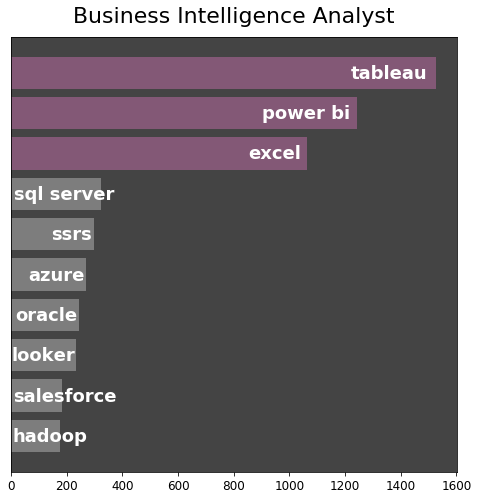

ssrs           227
azure          262
salesforce     279
aws            306
looker         308
sql server     452
oracle         465
power bi      1448
tableau       2352
excel         2794
dtype: int64


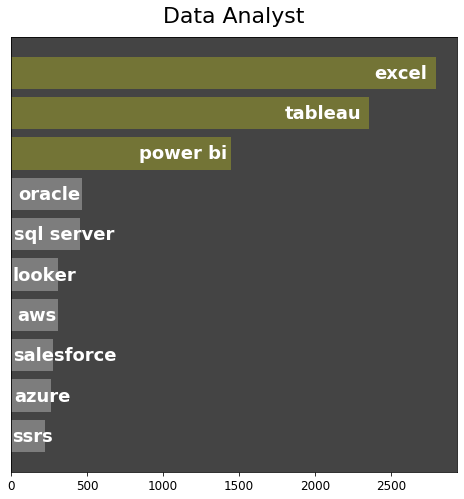

pyspark       111
sql server    128
tableau       131
gcp           132
hive          141
nosql         210
kafka         233
hadoop        243
azure         347
aws           494
dtype: int64


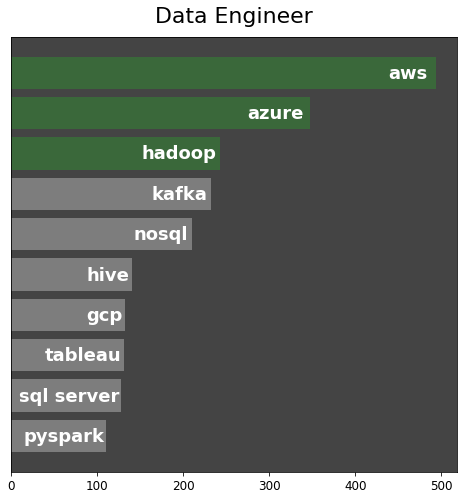

numpy            408
power bi         411
pandas           519
hadoop           544
azure            665
scikit-learn     726
pytorch          742
tensorflow       893
aws              913
tableau         1070
dtype: int64


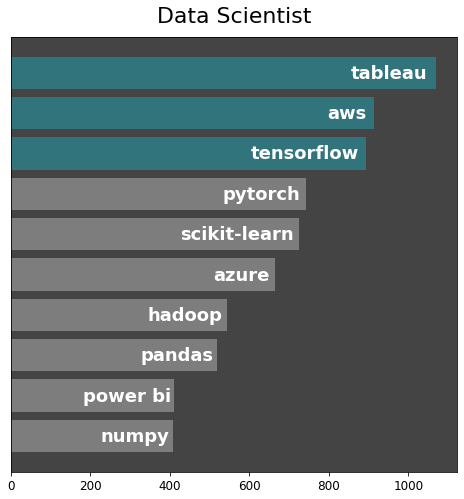

pandas          100
keras           110
scikit-learn    187
azure           196
gcp             202
kubernetes      215
docker          216
aws             344
pytorch         404
tensorflow      417
dtype: int64


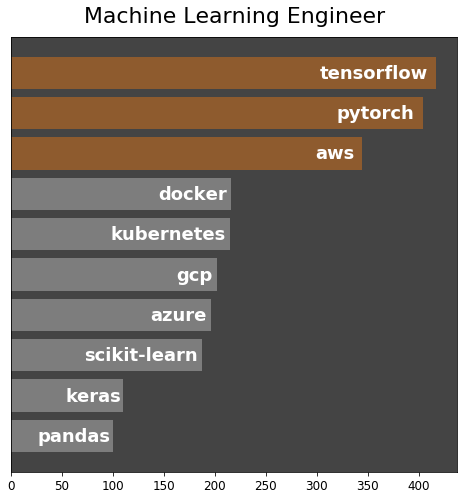

In [88]:
''' 
'#ff7f0e' orange
'#17becf' blue
'#e377c2' purple 
'#bcbd22' yellow 
'#2ca02c' green 
'''

color_list = ['#17becf', '#bcbd22', '#2ca02c', '#ff7f0e', '#e377c2']

clean_column_names = [word.replace("_", " ") for word in tech_df.columns]

tech_df.columns = clean_column_names

grouped = tech_df.groupby('job label')

for group in grouped:

    top_ten = group[1].drop('job label', axis=1).sum().astype(int).sort_values(ascending=False).head(10).sort_values(ascending=True)
    print(top_ten)
    categories = [i for i in top_ten.index]
    values = [top_ten[word] for word in categories]

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.set_facecolor('#444444')
    
    if group[0] == 'Data Scientist':
        color=color_list[0]
    if group[0] == 'Data Analyst':
        color=color_list[1]
    if group[0] == 'Data Engineer':
        color=color_list[2]
    if group[0] == 'Machine Learning Engineer':
        color=color_list[3]
    if group[0] == 'Business Intelligence Analyst':
        color=color_list[4]
    
    bars = ax.barh(categories, values, color=['#d4d4d4' if x < 7 else color for x in range(len(values))], alpha=0.4)
    
    if group[0] == 'Data Analyst':
        for bar, label in zip(bars, categories):
                xval = bar.get_width()
                if label == 'sql server':
                    ax.text(xval * 1.5, bar.get_y() + bar.get_height()/2, label,
                            ha='right', va='center', color='white', fontweight='bold', fontsize=18)
                elif label == 'looker':
                    ax.text(xval * 1.4, bar.get_y() + bar.get_height()/2, label,
                            ha='right', va='center', color='white', fontweight='bold', fontsize=18)
                elif label == 'salesforce':
                    ax.text(xval * 2.5, bar.get_y() + bar.get_height()/2, label,
                            ha='right', va='center', color='white', fontweight='bold', fontsize=18)
                elif label == 'azure':
                    ax.text(xval * 1.5, bar.get_y() + bar.get_height()/2, label,
                            ha='right', va='center', color='white', fontweight='bold', fontsize=18)
                elif label == 'ssrs':
                    ax.text(xval * 1.2, bar.get_y() + bar.get_height()/2, label,
                            ha='right', va='center', color='white', fontweight='bold', fontsize=18)
                else:
                    ax.text(xval * 0.98, bar.get_y() + bar.get_height()/2, label,
                            ha='right', va='center', color='white', fontweight='bold', fontsize=18)
    elif group[0] == 'Business Intelligence Analyst':
        for bar, label in zip(bars, categories):
                xval = bar.get_width()
                if label == 'sql server':
                    ax.text(xval * 1.15, bar.get_y() + bar.get_height()/2, label,
                            ha='right', va='center', color='white', fontweight='bold', fontsize=18)
                elif label == 'salesforce':
                    ax.text(xval * 2.08, bar.get_y() + bar.get_height()/2, label,
                            ha='right', va='center', color='white', fontweight='bold', fontsize=18)
                elif label == 'hadoop':
                    ax.text(xval * 1.55, bar.get_y() + bar.get_height()/2, label,
                            ha='right', va='center', color='white', fontweight='bold', fontsize=18)
                else:
                    ax.text(xval * 0.98, bar.get_y() + bar.get_height()/2, label,
                            ha='right', va='center', color='white', fontweight='bold', fontsize=18)
        
    else:
        for bar, label in zip(bars, categories):
                xval = bar.get_width()
                ax.text(xval * 0.98, bar.get_y() + bar.get_height()/2, label,
                        ha='right', va='center', color='white', fontweight='bold', fontsize=18)

    ax.set_title(group[0], fontsize=22, y=1.02)
    
    plt.xticks(fontsize=12)
    plt.yticks([])
    
    plt.savefig("most_frequent_{}_tech_words.png".format(group[0]), dpi=300)

    plt.show()

